<a href="https://colab.research.google.com/github/Cristobal314/Ayudantias_MAT041/blob/master/Ayudantia_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ayudantía 2
Ejercicio 3




**Trabajaremos los conceptos de Estadística Bivariada y Regresión lineal simple**

# **Estadística Bivariada**

Primero importamos las librerias necesarias para realizar un análisis estadístico con la siguiente nomenclatura
```
import nombre_libreria as sobrenombre
```



In [3]:
import numpy as np #libreria de algebra lineal
import pandas as pd #libreria de procesamiento de datos
import matplotlib.pyplot as plt #Gráficos
import seaborn as sns #Se usa para graficar el mapa de calor

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Procedemos a abrir la base de datos para estudiar problemas de estadistica bivariada. Trabajaremos con datos sobre la venta de videojuegos 

In [5]:
data = pd.read_csv("/content/Video_Games_Sales_as_at_22_Dec_2016.csv") #pd.read_csv abre el archivo en formato csv (comma separated value)
data.dropna() #Eliminar datos NaN 

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,0.01,0.00,0.00,0.00,0.01,46.0,4.0,2.4,21.0,Fluid Studios,E
16677,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0,Criterion Games,M
16696,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,Atomic Games,T


Un indicador de asociación lineal entre variables es la **Covarianza**.
La covarianza entre dos variables $X$ e $Y$ está dada por:
$$cov(X,Y) = \frac{1}{n}\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})$$
O equivalentemente
$$cov(X,Y) = \frac{1}{n}\sum_{i=1}^n x_i\cdot y_i - \bar{x}\bar{y}$$

In [6]:
#Calculo de covarianza entre las variables EU_Sales y Global_Sales
eu_sales = data["EU_Sales"]
global_sales = data["Global_Sales"]

#En la libreria numpy el comando cov nos entrega la matriz de covarianzas
np.cov(eu_sales,global_sales)

array([[0.25329408, 0.70210991],
       [0.70210991, 2.39610315]])

Ahora haremos un análisis de la **correlación** entre las variables, recuerde que la correlación lineal entre dos variables se define como
$$corr(X,Y) = \frac{\sum\limits_{i=1}^n(x_i - \bar{x})(y_i -\bar{y})}{\sqrt{\sum\limits_{i=1}^n (x_i-\bar{x})^2\sum\limits_{i=1}^n (y_i-\bar{y})^2}}$$

Una fórmula alternativa para calcular correlación es

$$ corr(X,Y) = \frac{\sigma_{XY}}{\sigma_X \sigma_Y}$$

Donde $\sigma_X$,$\sigma_Y$ son las desviaciones estándar de las variables $X$ e $Y$ respectivamente y $\sigma_{XY}$ es la covarianza entre $X$ e $Y$.

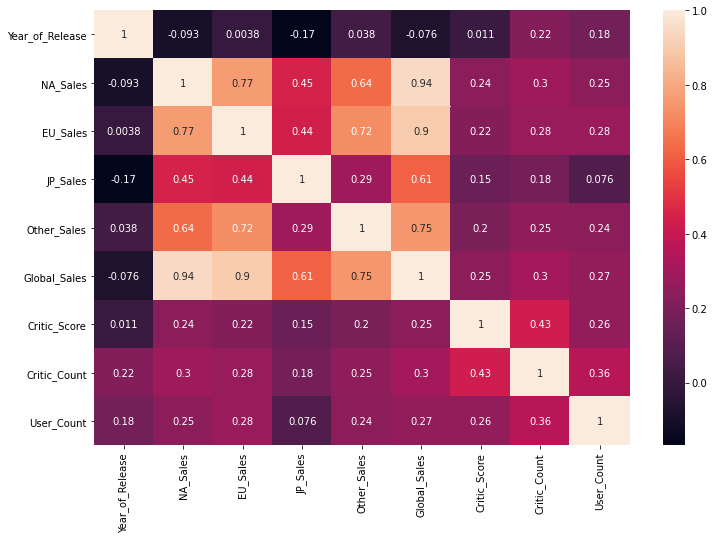

In [7]:
plt.figure(figsize=(12, 8))#Fijamos el tamaño de la figura

data_corr = data.corr()#Calculamos la matriz de correlacion entre las variables

sns.heatmap(data_corr, 
            xticklabels = data_corr.columns.values,
            yticklabels = data_corr.columns.values,
            annot = True); #El mapa de calor nos indica mediante colores que tan fuerte es la correlacion lineal entre las variables

Tambien es posible graficar todas las variables cruzadas entre si para observar su comportamiento con la libreria seaborn con el comando


```
sns.pairplot(datos, diag_kind = "kde")
```
  Existen otros seteos para este comando los cuales se pueden encontrar en la documentación de seaborn [https://seaborn.pydata.org/generated/seaborn.pairplot.html](https://)


<Figure size 1008x1008 with 0 Axes>

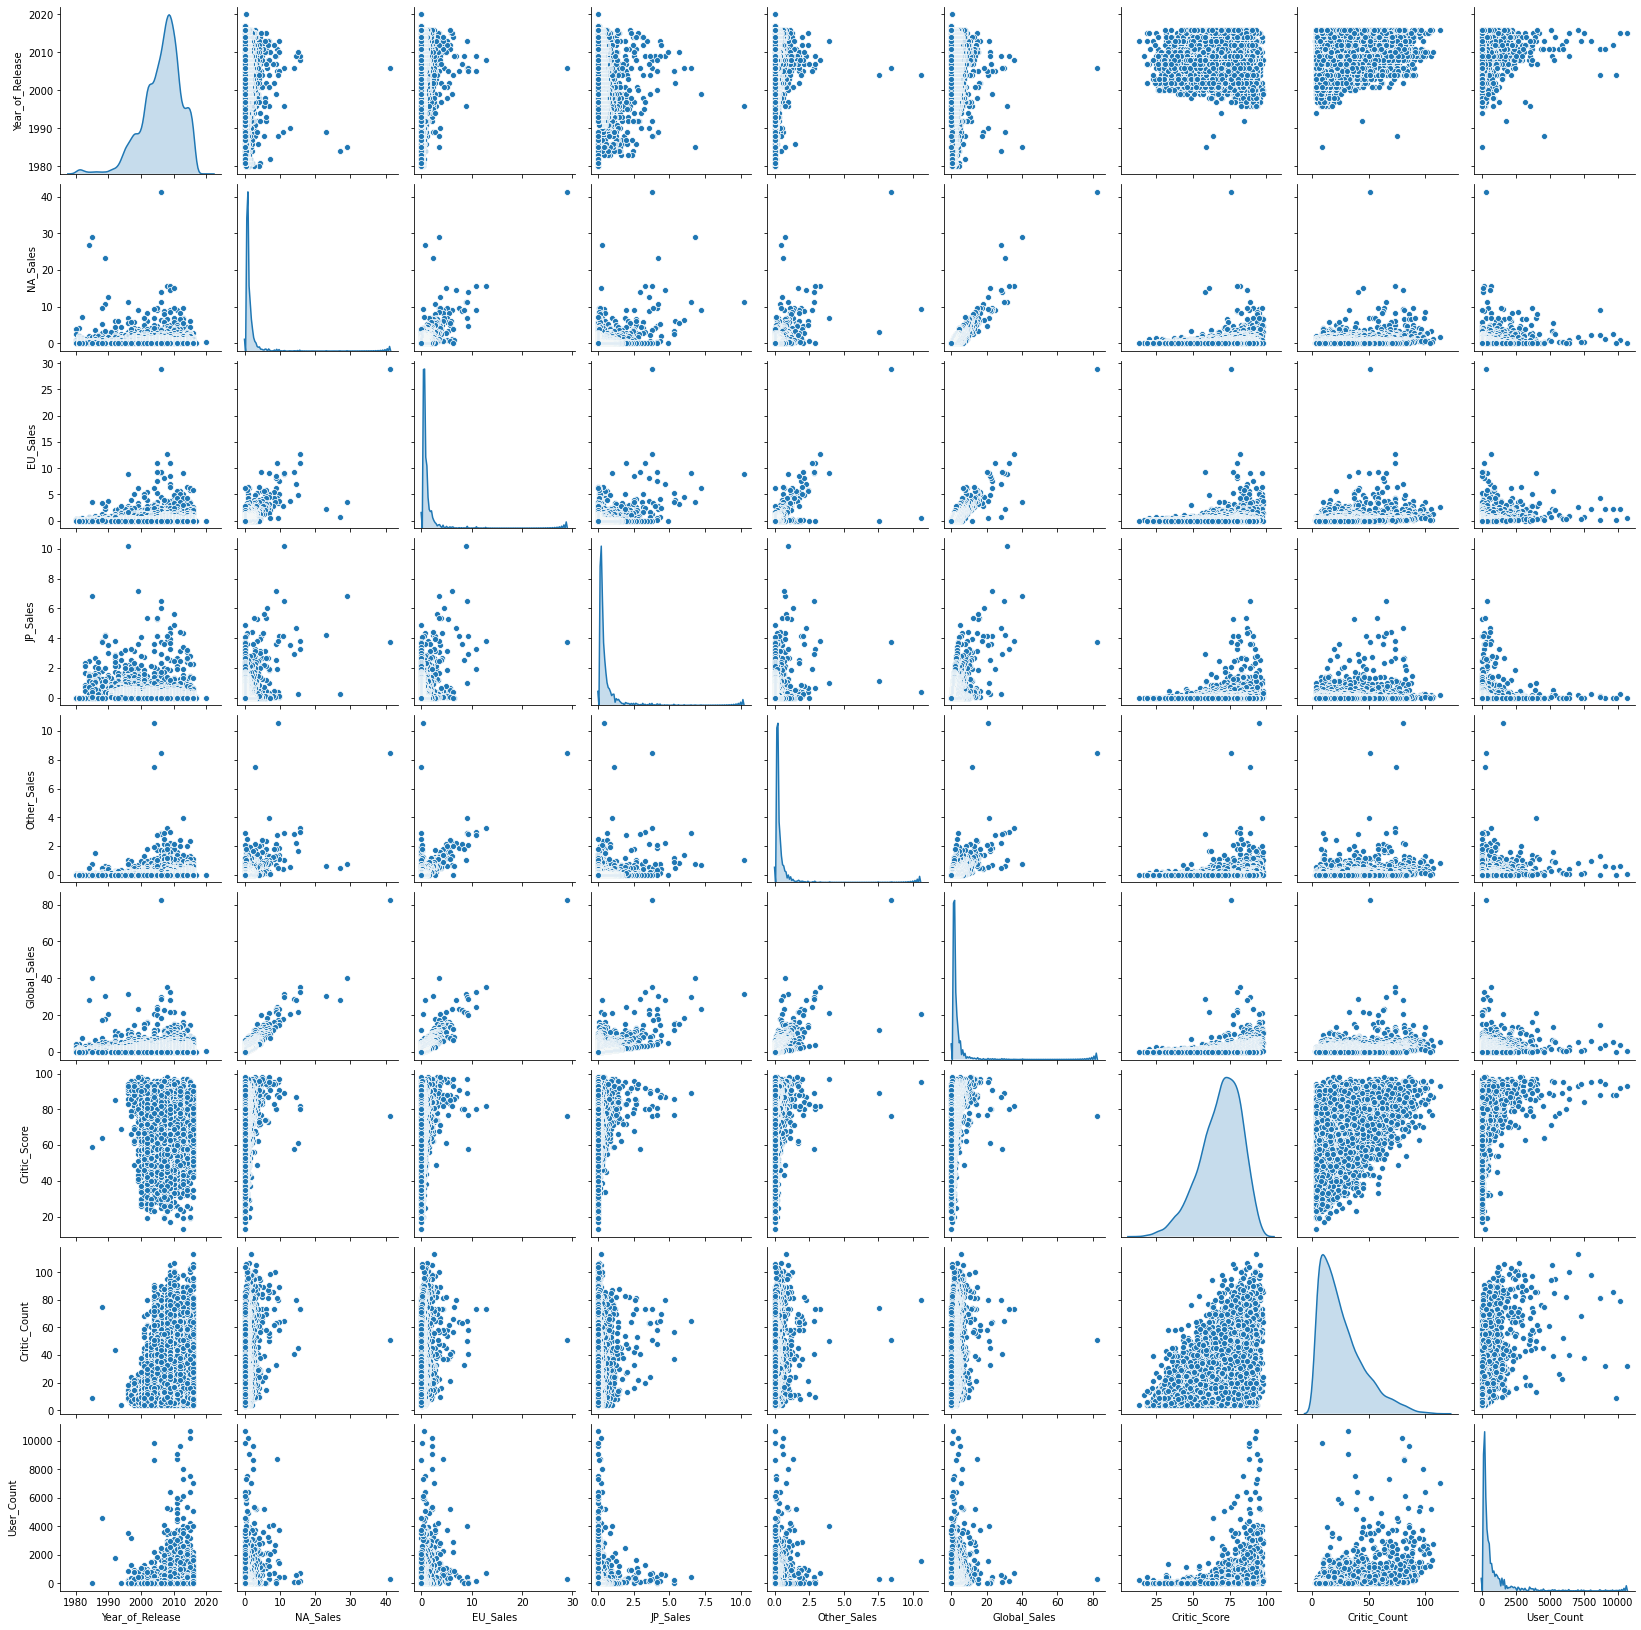

In [8]:
plt.figure(figsize=(14, 14))

sns.pairplot(data, diag_kind='kde');


Las variables NA_Sales y Global_Sales presentan correlación alta pues su coeficiente de correlación lineal es $0.94$ por lo que realizaremos una regresión lineal considerando tales variables.

En general, el ajuste lineal simple lo podemos plantear como la recta:
$$ \hat{y_i} = \hat{a}+\hat{b}x_i\quad i=1,\ldots,n$$
Para esta labor usaremos la libreria sklearn

In [9]:
from sklearn.linear_model import LinearRegression

El modelo de regresión lineal de sklearn recibe como input vectores con los valores que queremos estimar de forma lineal, para esto nuestras variables deben ser convertidas en arrays con el comando


```
np.asarray(datos)
```
Además, la variable x se debe entregar en dos dimensiones por lo que usamos el comando 


```
.reshape(-1,1)
```




In [19]:
x = np.asarray(data["NA_Sales"]).reshape(-1,1)
y = np.asarray(data["Global_Sales"])

Para crear un modelo de regresion usamos LinearRegression()

In [20]:
model = LinearRegression()

Para que el modelo se ajuste a nuestros datos usamos el comando .fit()

Este comando calcula los valores óptimos para intercepto y pendiente.


In [21]:
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Luego, para evaluar la calidad del modelo se usa el coeficiente de determinación $R^2$ con .score()

In [23]:
r_sq = model.score(x,y)
print("R^2: ",r_sq)

R^2:  0.8855007503060843


Tambien es posible conocer los atributos que determinó el modelo con model.intercept_ y model.coef_

In [24]:
print("Intercepto: ",model.intercept_)
print("Pendiente: ",model.coef_)

Intercepto:  0.06204106257017372
Pendiente:  [1.79053279]


Con esto podemos realizar predicciones del comportamiento de las variables con el comando

In [25]:
y_pred = model.predict(x)

In [26]:
y_pred

array([7.41184773e+01, 5.21307346e+01, 2.81375952e+01, ...,
       6.20410626e-02, 7.99463905e-02, 6.20410626e-02])

Observemos la predicción realizada mediante la regresión lineal

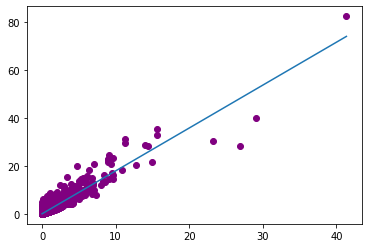

In [35]:
plt.scatter(x,y,c="purple")
plt.plot(x,y_pred)

**Ejercicio 1:** Considere los datos 

```
x = [5,15,25,35,45,55]
y = [15,11,2,8,25,32]
```
Justifique por que es adecuado realizar una regresión lineal para estimar $y$ dado $x$, luego muestre el coeficiente $R^2$ asociado a tal regresión y grafique sus resultados


**Ejercicio 2:** Considere el dataset 
https://drive.google.com/file/d/11pGx5kUdh7_fnfMZ1psGESgY4hgVyZtY/view?usp=sharing 

En el cual podrá encontrar los datos de casas que han sido vendidas en alguna comuna de Santiago. Como Ingeniero Civil Matemático se le pide realizar una estimación del precio de las viviendas considerando la variable sqft_living la cual nos indica los metros cuadrados que posee el living de la vivienda. 

Justifique la elección de un modelo lineal y muestre los gráficos asociados. ¿Como se podría mejorar la estimación? 